In [4]:
%reset -f

import os
import gc
import warnings
import numpy as np
from numba import njit
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [5]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name

path = "./truth/*/*.npz"
files_name = get_files_names(path)
print(files_name)

def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()
    
files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))
    
# need to check the order of data name.
files_name

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files
GEV=1e3

del files_name, files
gc.collect()

['./truth/archive/CGLMP.npz', './truth/archive/WpBoson.npz', './truth/archive/subLeadLepton.npz', './truth/archive/LeptonP.npz', './truth/archive/Higgs.npz', './truth/archive/LeadLepton.npz', './truth/archive/LeptonM.npz', './truth/archive/xi_xyz.npz', './truth/archive/WmBoson.npz', './truth/archive/LmNu.npz', './truth/archive/LpNu.npz', './truth/archive/MET.npz', './truth/archive/diLepton.npz']


253

In [6]:
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = [] # escape some mathmetical errors.

# Kinemetic info of leptons.
lep_kin = pd.DataFrame({
    'lep_p_E' : LepP['E'],
    'lep_p_px': LepP['px'],
    'lep_p_py': LepP['py'],
    'lep_p_pz': LepP['pz'],
    'lep_m_E' : LepM['E'],
    'lep_m_px': LepM['px'],
    'lep_m_py': LepM['py'],
    'lep_m_pz': LepM['pz'],
})/GEV

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
print(lep_kin.head(5))

# Kinemetic info of neutirnos.
nu_kin = pd.DataFrame({
    'nu_p_E' : NuP['E'],
    'nu_p_px': NuP['px'],
    'nu_p_py': NuP['py'],
    'nu_p_pz': NuP['pz'],
    'nu_m_E' : NuM['E'],
    'nu_m_px': NuM['px'],
    'nu_m_py': NuM['py'],
    'nu_m_pz': NuM['pz'],
})/GEV

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
print(nu_kin.head(5))

# CGLMP
CGLMP = pd.DataFrame({
    'Bxy' : CGLMP['Bxy'],
    'Byz' : CGLMP['Byz'],
    'Bzx' : CGLMP['Bzx'],
})

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(2928862, 8)
(2928862, 8)
      lep_p_E  lep_p_px   lep_p_py    lep_p_pz    lep_m_E   lep_m_px  \
0   19.465703 -5.065763  16.360542   -9.250574  12.031222  11.081455   
1  131.817141  8.901175   2.966260  131.482766  66.401992 -13.096559   
2   94.193734 -3.040100  49.431305   80.123430  26.267500   7.589698   
3  165.226891  4.702402 -19.638676  163.988219  36.290188   0.038865   
4    6.403636  5.808921  -2.135702   -1.643704  32.603137  11.729594   

    lep_m_py   lep_m_pz  
0   2.673936  -3.847299  
1  14.755815  63.403242  
2   1.677931  25.090863  
3  20.284725  30.091441  
4  30.418752   0.263776  
(2928862, 8)
(2928862, 8)
       nu_p_E    nu_p_px    nu_p_py     nu_p_pz      nu_m_E    nu_m_px  \
0   75.449547  -5.933027  30.212092   68.881516   46.680430  27.464617   
1  226.696359  59.309223 -25.300893  217.332734  384.335750  83.522359   
2    8.372312  -7.214337  -4.222511   -0.468329   66.342891   3.095675   
3   10.764710  -1.976395  -5.639073   -8.953977   30.333172 -17

,Bxy,Byz,Bzx
0,5.379610,-0.375224,8.00803
1,-4.331580,15.150000,-5.99553
2,4.612100,21.715400,19.46050
3,-12.159800,-1.537670,-5.16628
4,-0.905081,24.782200,6.81644


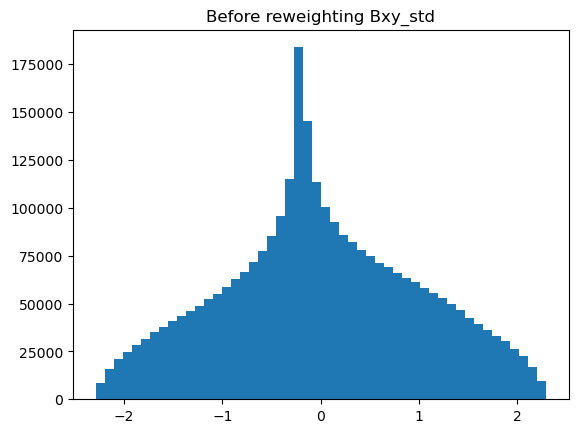

2.299248862698251 -2.292063273788311
std: 1.0000000000000007
2928862
CPU times: user 4.04 s, sys: 597 ms, total: 4.64 s
Wall time: 6.5 s


In [7]:
%%time

from sklearn.preprocessing import StandardScaler

# Bxy
# BXY_MAX = CGLMP['Bxy'].max(axis=None)
# BXY_MIN = CGLMP['Bxy'].min(axis=None)                     
# Bxy_norm = (CGLMP['Bxy'] - BXY_MIN)/(BXY_MAX - BXY_MIN)
SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform([[x] for x in CGLMP['Bxy']]).flatten() # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before reweighting Bxy_std")
plt.show()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print(len(Bxy_std))

In [8]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min())/n
intervals = [Bxy_std.min() + i*step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n-1, sampling), dtype=int)
for i in range(n-1):
    indices_arr[i] = np.random.choice(np.where((intervals[i]<Bxy_std)*(Bxy_std<=intervals[i+1]))[0], size=sampling, replace=False)

In [9]:
# %%time

# from sklearn.preprocessing import StandardScaler

# # Std
# SCALAR = StandardScaler()
# H_M_std = SCALAR.fit_transform([[x/GEV] for x in Higgs['m']]).flatten() # zero mean and unit variance
# print(H_M_std.max(), H_M_std.min())
# print(H_M_std.std())
# print(len(H_M_std))
# plt.hist(H_M_std, bins=50)
# plt.show()
# plt.close()

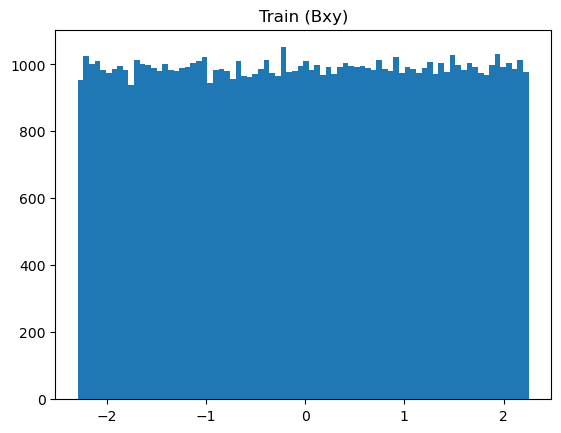

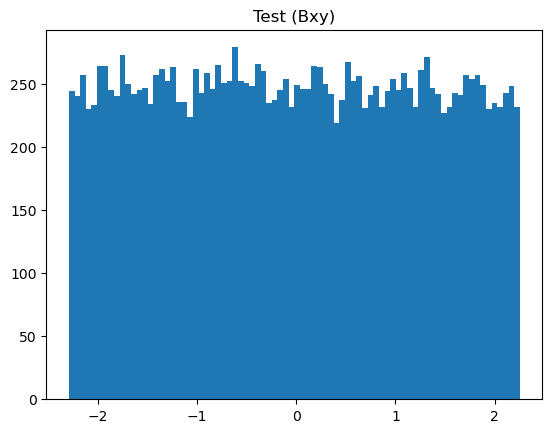

In [10]:
from sklearn.model_selection import train_test_split

train_indices, test_indices = train_test_split(indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42)

lep_train = lep_kin.iloc[train_indices]
lep_test  = lep_kin.iloc[test_indices]

nu_train = nu_kin.iloc[train_indices]
nu_test  = nu_kin.iloc[test_indices]

Bxy_train = Bxy_std[train_indices]
Bxy_test  = Bxy_std[test_indices]

plt.hist(Bxy_train, bins=80)
plt.title("Train (Bxy)")
plt.show()
plt.close()
plt.hist(Bxy_test, bins=80)
plt.title("Test (Bxy)")
plt.show()
plt.close()

In [11]:
def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs

if (lep_train.shape == nu_train.shape and 
    lep_test.shape  == nu_test.shape):
    print('With the same shapes...\n')
    # print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
    train = stack_parts(lep_train, nu_train)
    test  = stack_parts(lep_test , nu_test)
    FEA_MAX = np.max([train.max(), test.max()])
    FEA_MIN = np.min([train.min(), test.min()])
    train = (train - FEA_MIN)/(FEA_MAX - FEA_MIN)
    test  = (test  - FEA_MIN)/(FEA_MAX - FEA_MIN)
    print(f'Training data shape: {train.shape}\nTesting data shape: {test.shape}\n')
    
    del (train_indices, test_indices,
        lep_train, lep_test,
        nu_train, nu_test)
    
else:
    print('The shape of leptons are NOT the same with neutrinos shape...\n')
    print(f'Training data shape: {lep_train.shape}, {nu_train.shape}\nTesting data shape: {lep_test.shape}, {nu_test.shape}')

print(f'Train: mean->{train.mean():.3f}, std->{train.std():.3f}, min->{train.min():.3f}, max->{train.max():.3f}')
print(f'Test : mean->{test.mean():.3f}, std->{test.std():.3f}, min->{test.min():.3f}, max->{test.max():.3f}\n')

print(f'Feature_train : mean->{Bxy_train.mean():.3f}, std->{Bxy_train.std():.3f}, min->{Bxy_train.min():.3f}, max->{Bxy_train.max():.3f}')
print(f'Feature_test  : mean->{Bxy_test.mean():.3f}, std->{Bxy_test.std():.3f}, min->{Bxy_test.min():.3f}, max->{Bxy_test.max():.3f}')

With the same shapes...

Training data shape: (79200, 16)
Testing data shape: (19800, 16)

Train: mean->0.497, std->0.019, min->0.031, max->1.000
Test : mean->0.497, std->0.019, min->0.000, max->0.987

Feature_train : mean->-0.017, std->1.313, min->-2.292, max->2.253
Feature_test  : mean->-0.030, std->1.307, min->-2.292, max->2.253


The step is: 1584


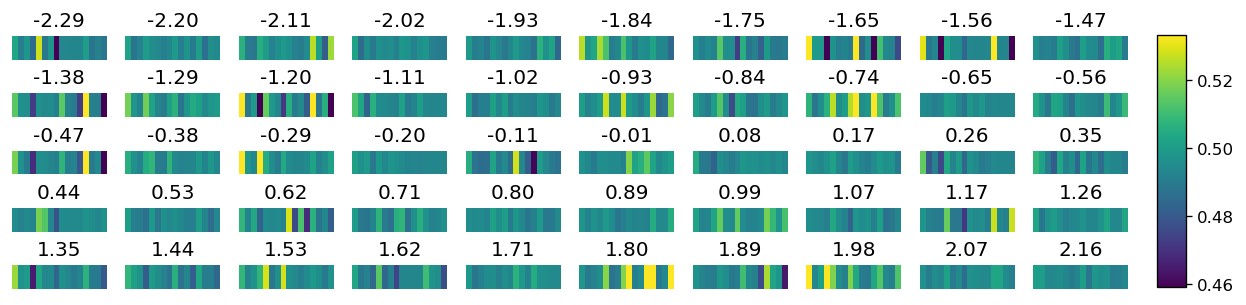

In [12]:
num_figures = 50
figure_size = 4

num_rows = 5
num_cols = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3), dpi=120)
axes = axes.flatten()

df = pd.DataFrame(
    {'Bxy' : Bxy_train}
).sort_values(by='Bxy')
index = df.index
step = int(np.floor(len(train)/num_figures))
print("The step is:", step)
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
for i, ax in enumerate(axes):
    im = ax.imshow([train[index][i*step], train[index][i*step], train[index][i*step], train[index][i*step]], cmap='viridis', origin='lower', vmin=train[index][0].min(), vmax=train[index][-1].max())
    ax.set_title(f'{df["Bxy"].iloc[i*step]:.2f}')
    ax.axis('off')  # Turn off axis labels
cbar = fig.colorbar(im, cax=cax)
plt.show()
plt.close()

In [13]:
%%time

# !pip install xgbtune --upgrade --quiet
from xgboost import XGBRegressor
from xgbtune.tune import tune_xgb_model

CPU times: user 169 ms, sys: 57.4 ms, total: 227 ms
Wall time: 8.42 s


In [14]:
# Auto tuning hyperparameters and do the cross-validation

params = {'eval_metric': 'mphe'}
params, round_count = tune_xgb_model(params, 
                                     train, Bxy_train,
                                     nfold=5, shuffle=True)

tuning pass 0...
computing best round...
best round: 258
tuning max_depth and min_child_weight ...
best loss: 0.1482
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 0.1482
best gamma: 0.0
re-computing best round...
best round: 191
tuning subsample and colsample_bytree ...
best loss: 0.1482
best subsample: 1.0
best colsample_bytree: 1.0
fine tuning subsample and colsample_bytree ...
best loss: 0.1482
best subsample: 1.0
best colsample_bytree: 1.0
tuning alpha and lambda ...
best loss: 0.1428
best alpha: 1
best lambda: 5
tuning seed ...
best loss: 0.1428
best seed: 0
{'eval_metric': 'mphe', 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 1.0, 'colsample_bytree': 1.0, 'alpha': 1, 'lambda': 5, 'seed': 0}
tuning pass 1...
computing best round...
best round: 202
tuning max_depth and min_child_weight ...
best loss: 0.1369
best max_depth: 8
best min_child_weight: 1
tuning gamma ...
best loss: 0.1369
best gamma: 0.0
re-computing best round...
best round:

In [15]:
# Fit the results

model = XGBRegressor(**params)
model.fit(train, Bxy_train)
Bxy_pred = model.predict(test)

RMSE: 1.0793254087850217
MAX of pred: 2.1409008502960205; MIN of pred: -2.9795100688934326
MAX of test: 2.2532050265068797; MIN of test: -2.2916605580198732


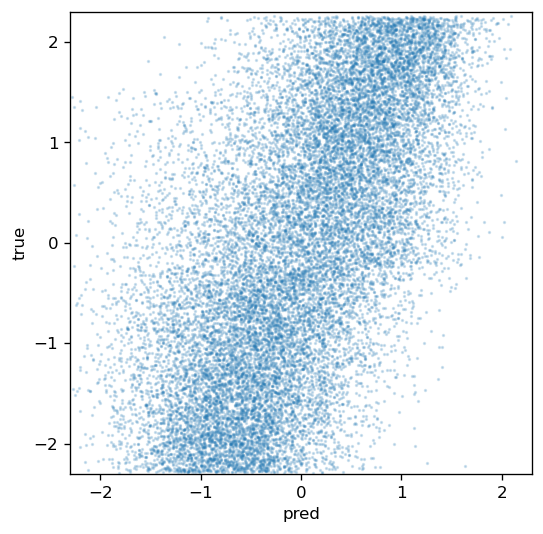

In [17]:
from sklearn.metrics import mean_squared_error

print(f'''RMSE: {mean_squared_error(Bxy_test, Bxy_pred)}
MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}
MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}''')

# Plot the results
fig = plt.figure(figsize=(5,5), dpi=120)
ax = fig.add_subplot()
plt.plot(Bxy_pred, Bxy_test, '.', color="tab:blue", alpha=.2, markersize=2)
plt.xlim([-2.3,2.3])
plt.ylim([-2.3,2.3])
plt.xlabel('pred')
plt.ylabel('true')
ax.set_aspect('equal', adjustable='box')
plt.show() 
plt.close()